<a href="https://www.kaggle.com/code/krupadharamshi/house-prices-using-xgboost?scriptVersionId=184875380" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
print(train.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [4]:
print(train.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [5]:
print(train.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [6]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
print(train.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [8]:
missing_values = train.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


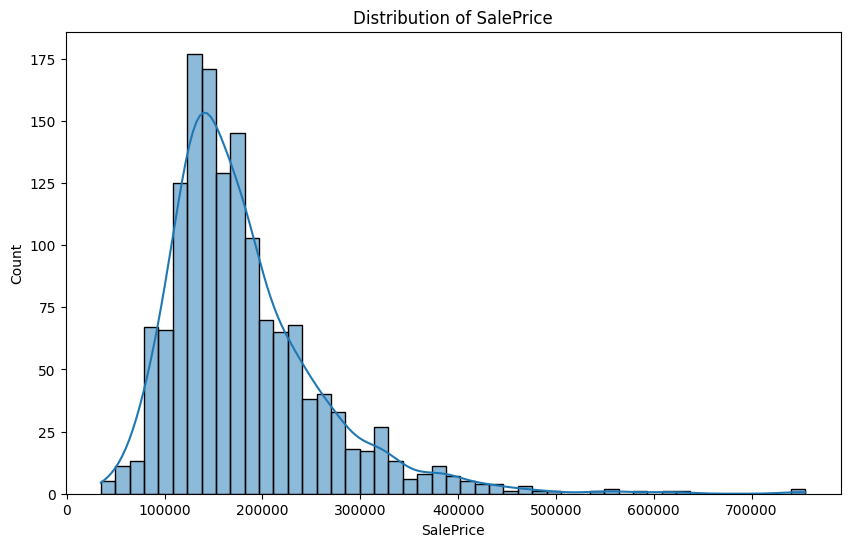

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


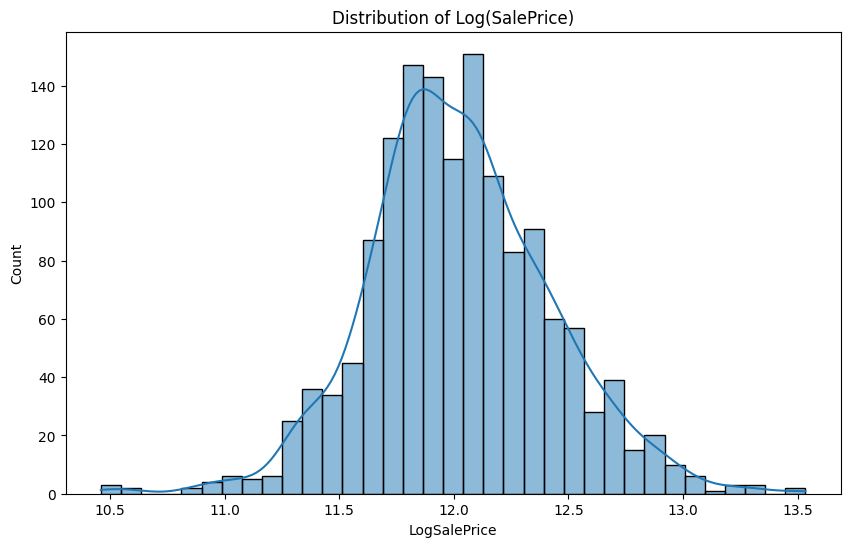

In [10]:

train['LogSalePrice'] = np.log1p(train['SalePrice'])
plt.figure(figsize=(10, 6))
sns.histplot(train['LogSalePrice'], kde=True)
plt.title('Distribution of Log(SalePrice)')
plt.show()

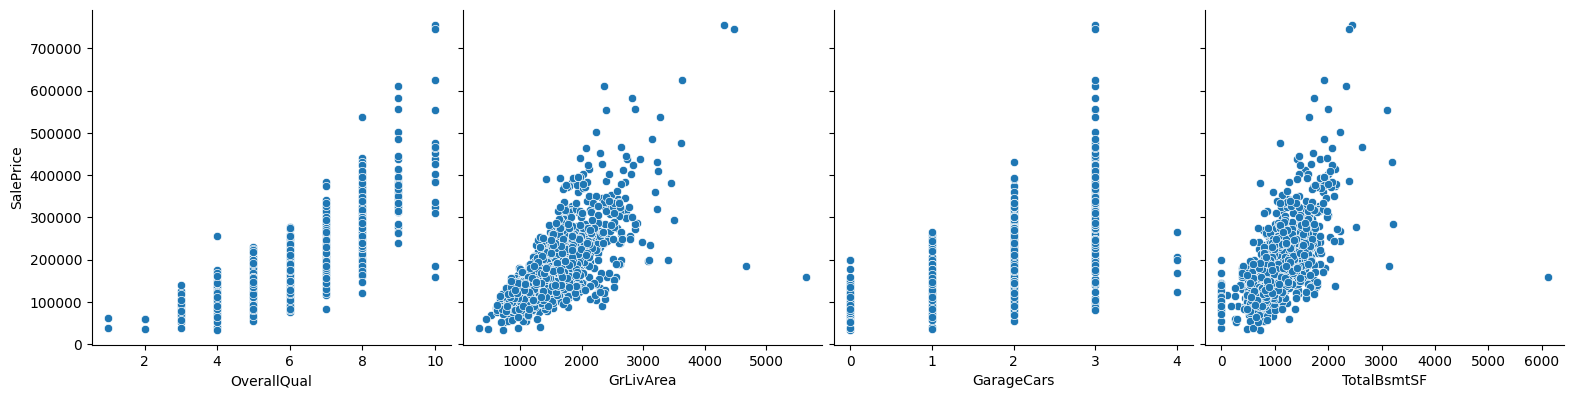

In [11]:

numeric_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
sns.pairplot(train, x_vars=numeric_features, y_vars='SalePrice', height=4, aspect=1, kind='scatter')
plt.show()

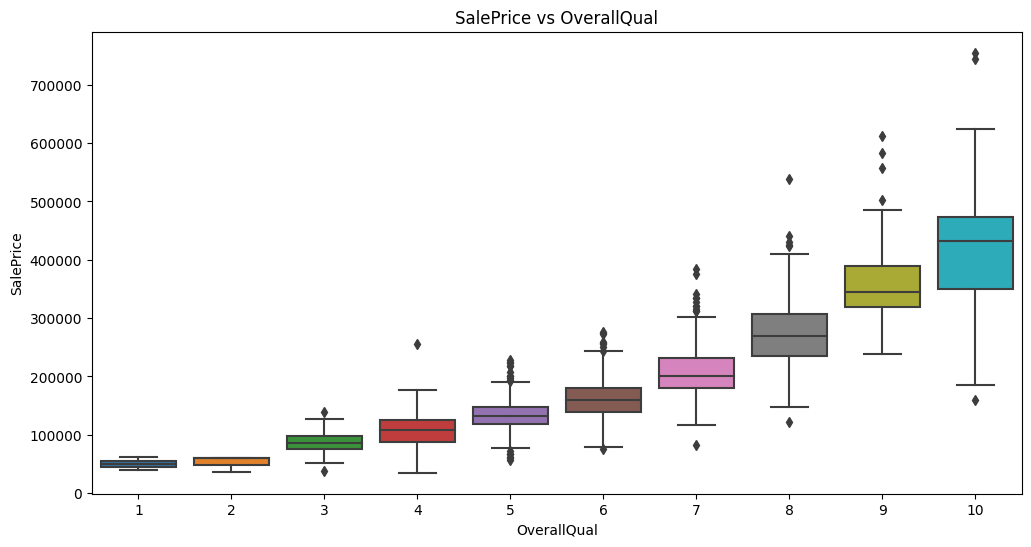

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train)
plt.title('SalePrice vs OverallQual')
plt.show()

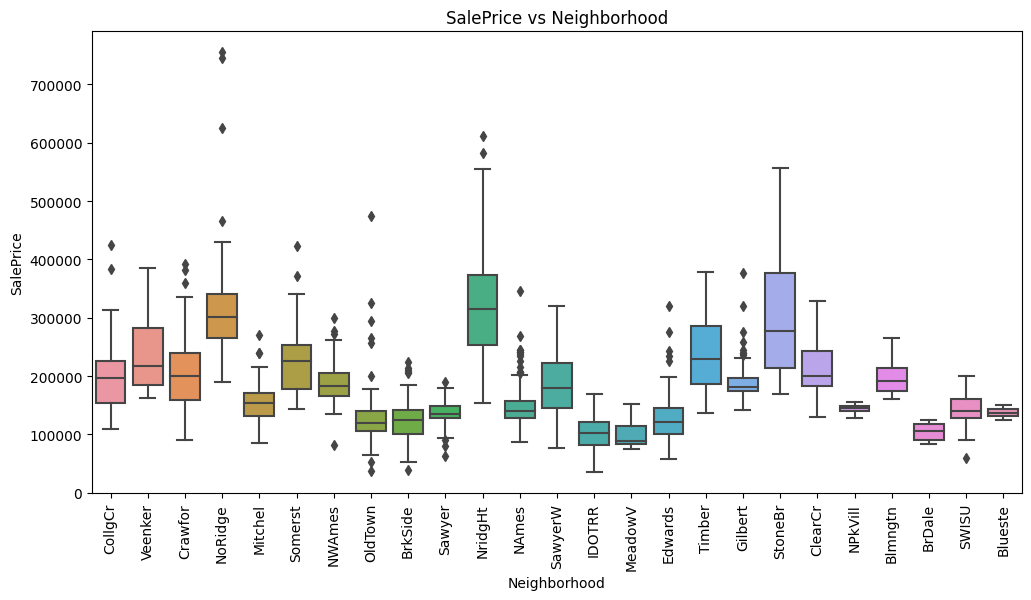

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train)
plt.title('SalePrice vs Neighborhood')
plt.xticks(rotation=90)
plt.show()

In [14]:
train = train.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
test = test.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)


In [15]:
for col in train.columns:
    if train[col].dtype == 'object':
        train[col] = train[col].fillna(train[col].mode()[0])
    else:
        train[col] = train[col].fillna(train[col].median())

for col in test.columns:
    if test[col].dtype == 'object':
        test[col] = test[col].fillna(test[col].mode()[0])
    else:
        test[col] = test[col].fillna(test[col].median())

In [16]:
label_encoders = {}
for col in train.columns:
    if train[col].dtype == 'object':
        le = LabelEncoder()
        train[col] = le.fit_transform(train[col])
        label_encoders[col] = le

for col in test.columns:
    if test[col].dtype == 'object' and col in label_encoders:
        le = label_encoders[col]
        test[col] = le.transform(test[col])
    elif test[col].dtype == 'object':
        le = LabelEncoder()
        test[col] = le.fit_transform(test[col])
        label_encoders[col] = le

In [17]:
X = train.drop(['Id', 'SalePrice'], axis=1)
X_test = test.drop(['Id'], axis=1)
X, X_test = X.align(X_test, join='inner', axis=1)

In [18]:
y = train['SalePrice']

In [19]:
assert X.columns.tolist() == X_test.columns.tolist(), "Feature mismatch between train and test data"


In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test)



In [22]:
params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

num_rounds = 100


In [23]:
bst = xgb.train(params, dtrain, num_rounds, evals=[(dval, 'eval')], early_stopping_rounds=10)


[0]	eval-rmse:81538.87180
[1]	eval-rmse:76120.58527
[2]	eval-rmse:71195.10321
[3]	eval-rmse:66575.51904
[4]	eval-rmse:62406.90732
[5]	eval-rmse:58425.23415
[6]	eval-rmse:54957.86670
[7]	eval-rmse:51932.05329
[8]	eval-rmse:49167.52333
[9]	eval-rmse:46627.57656
[10]	eval-rmse:44284.42835
[11]	eval-rmse:42270.06194
[12]	eval-rmse:40555.14265
[13]	eval-rmse:38945.21063
[14]	eval-rmse:37454.05770
[15]	eval-rmse:36081.95575
[16]	eval-rmse:35244.15416
[17]	eval-rmse:34203.60252
[18]	eval-rmse:33295.06571
[19]	eval-rmse:32503.75406
[20]	eval-rmse:31829.93661
[21]	eval-rmse:31142.45861
[22]	eval-rmse:30471.62762
[23]	eval-rmse:29925.54246
[24]	eval-rmse:29485.50514
[25]	eval-rmse:28965.88338
[26]	eval-rmse:28570.24390
[27]	eval-rmse:28214.37439
[28]	eval-rmse:28036.78640
[29]	eval-rmse:27812.10813
[30]	eval-rmse:27656.84943
[31]	eval-rmse:27623.74299
[32]	eval-rmse:27396.36295
[33]	eval-rmse:27303.65550
[34]	eval-rmse:27158.52479
[35]	eval-rmse:27029.53789
[36]	eval-rmse:26869.68941
[37]	eval-r

In [24]:
y_pred = bst.predict(dval)
mse = mean_squared_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"Validation RMSE: {rmse:.4f}")

Validation RMSE: 25640.0090


In [25]:
y_test_pred = bst.predict(dval)

In [26]:
y_test_pred

array([142111.55 , 326711.3  , 111217.67 , 163753.4  , 344777.22 ,
        78697.14 , 228495.73 , 147030.97 ,  78506.81 , 132807.4  ,
       152249.25 , 122441.44 , 125898.7  , 196150.38 , 171128.38 ,
       129977.375, 195701.8  , 138934.88 , 120216.734, 224298.9  ,
       163849.69 , 225862.7  , 180133.81 , 134593.78 , 196662.27 ,
       166153.02 , 188502.02 , 103243.01 , 174995.12 , 190943.64 ,
       130380.69 , 264185.8  , 202029.64 , 113930.89 , 254787.02 ,
       146748.38 , 131653.02 , 209594.86 , 307512.53 , 106894.02 ,
       122373.09 , 239834.66 , 116661.59 , 346607.84 , 126433.98 ,
       149762.7  , 109458.36 , 129279.766, 400654.3  , 135731.3  ,
       123239.305, 214399.28 , 127172.055, 314773.62 , 142979.98 ,
       267896.97 , 200176.8  , 154117.33 , 131279.7  , 113229.805,
        73865.016, 157958.17 , 321379.4  , 311466.34 , 278154.7  ,
       226795.45 , 113617.28 , 310363.97 , 114089.77 , 159847.61 ,
       123787.41 , 127122.195, 111256.29 ,  82467.53 , 495948.

In [27]:
mse = mean_squared_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 657410061.4963
Root Mean Squared Error (RMSE): 25640.0090
Mean Absolute Error (MAE): 15908.9463
R-squared (R²): 0.9143


In [28]:
y_test_pred = bst.predict(dtest)

In [29]:
submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': y_test_pred})
submission.to_csv('submission.csv', index=False)

In [30]:
import os
if os.path.isfile('submission.csv'):
    print("Submission file saved successfully.")
else:
    print("Error: Submission file not found.")

Submission file saved successfully.


In [31]:
submission.head()

,Id,SalePrice
0,1461,121678.257812
1,1462,160822.421875
2,1463,182771.906250
3,1464,186927.859375
4,1465,194873.312500
